In [13]:
print("Lab - 3")

Lab - 3


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

# 1. Load Data
def load_data(file_path):
    # Load Excel file using pandas
    return pd.read_excel(file_path)

# 2. Calculate Class Centroids, Spread, and Distance
def calculate_centroids_and_spread(df, class_label_column):
    # Group by class and calculate centroids and spread
    centroids = df.groupby(class_label_column).mean()
    spreads = df.groupby(class_label_column).std()
    return centroids, spreads

def calculate_interclass_distance(centroid1, centroid2):
    # Calculate Euclidean distance between two centroids
    return np.linalg.norm(centroid1 - centroid2)

# 3. Histogram and Feature Analysis
def plot_feature_histogram(feature_data, bins=30):
    plt.hist(feature_data, bins=bins)
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Feature')
    plt.show()

def calculate_mean_variance(feature_data):
    # Calculate mean and variance of a feature
    return np.mean(feature_data), np.var(feature_data)

# 4. Minkowski Distance Calculation
def calculate_minkowski_distance(vector1, vector2, p_range):
    distances = []
    for p in p_range:
        dist = minkowski(vector1, vector2, p)
        distances.append(dist)
    return distances

def plot_minkowski_distances(p_range, distances):
    plt.plot(p_range, distances, marker='o')
    plt.xlabel('Minkowski Distance Order (r)')
    plt.ylabel('Distance')
    plt.title('Minkowski Distance vs r')
    plt.show()

# 5. Train-Test Split
def split_dataset(X, y, test_size=0.3):
    return train_test_split(X, y, test_size=test_size)

# 6. k-NN Classification
def train_knn_classifier(X_train, y_train, n_neighbors=3):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return knn

def evaluate_accuracy(knn, X_test, y_test):
    return knn.score(X_test, y_test)

# 7. Prediction
def predict_classes(knn, X_test):
    return knn.predict(X_test)

# 8. Confusion Matrix and Performance Metrics
def evaluate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

def calculate_performance_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    return precision, recall, f1

# Main Program


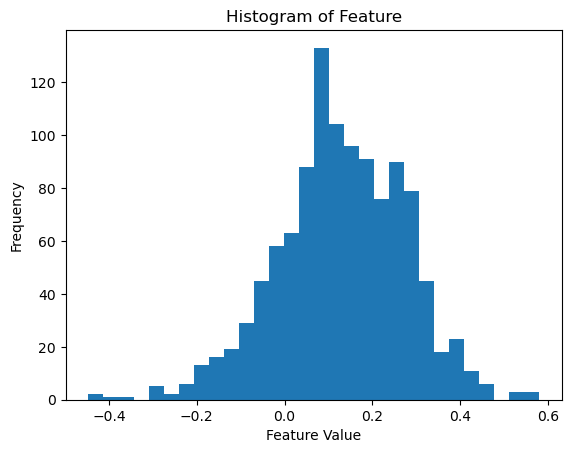

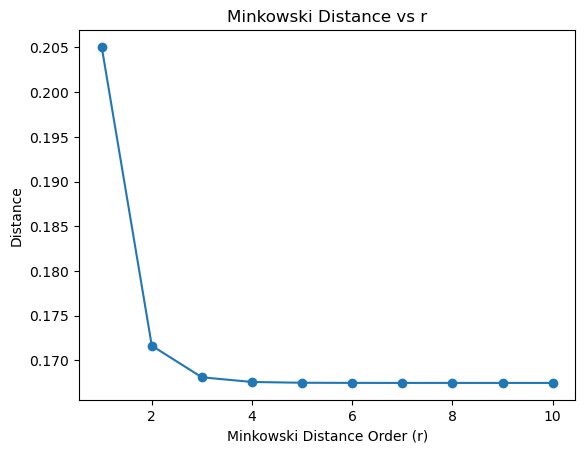

Centroids:
                embed_0   embed_1   embed_2   embed_3   embed_4   embed_5  \
binary_label                                                               
0            -0.159767  0.142137  0.101010  0.195075 -0.483250 -0.165696   
1            -0.196129  0.100786  0.109304  0.217669 -0.501275 -0.215422   

               embed_6   embed_7   embed_8   embed_9  ...  embed_375  \
binary_label                                          ...              
0             0.167479  0.122250  0.135688 -0.046579  ...  -0.320871   
1             0.123194  0.159113  0.117358 -0.073708  ...  -0.350794   

              embed_376  embed_377  embed_378  embed_379  embed_380  \
binary_label                                                          
0             -0.063993  -0.027300  -0.070217  -0.224008  -0.173524   
1             -0.105649  -0.004486  -0.146509  -0.194904  -0.193729   

              embed_381  embed_382  embed_383    output  
binary_label                                       

In [2]:
if __name__ == "__main__":
    # Load data
    file_path = 'training_mathbert.xlsx'
    df = load_data(file_path)

    # Use actual column names from your dataset
    class_label_column = 'output'
    feature1 = 'embed_1'
    feature2 = 'embed_2'

    # Convert output to binary class labels
    df['binary_label'] = df[class_label_column].apply(lambda x: 1 if x >= 4 else 0)

    # Calculate centroids, spreads, and distance
    centroids, spreads = calculate_centroids_and_spread(df, 'binary_label')
    interclass_distance = calculate_interclass_distance(centroids.iloc[0], centroids.iloc[1])

    # Plot histogram and analyze feature
    plot_feature_histogram(df[feature1])
    mean, variance = calculate_mean_variance(df[feature1])

    # Minkowski distance calculation
    p_range = range(1, 11)
    vector1 = df[feature1].values[:2]
    vector2 = df[feature2].values[:2]
    distances = calculate_minkowski_distance(vector1, vector2, p_range)
    plot_minkowski_distances(p_range, distances)

    # Train-test split
    X = df.drop(columns=['output', 'binary_label'])  # Drop original output and use binary label
    y = df['binary_label']
    X_train, X_test, y_train, y_test = split_dataset(X, y)

    # Convert to contiguous arrays (ensures compatibility with scikit-learn)
    X_train = np.ascontiguousarray(X_train)
    X_test = np.ascontiguousarray(X_test)
    y_train = np.ascontiguousarray(y_train)
    y_test = np.ascontiguousarray(y_test)

    # Train k-NN classifier
    knn = train_knn_classifier(X_train, y_train)

    # Evaluate accuracy
    accuracy = evaluate_accuracy(knn, X_test, y_test)

    # Prediction
    predictions = predict_classes(knn, X_test)

    # Confusion matrix and performance metrics
    cm = evaluate_confusion_matrix(y_test, predictions)
    precision, recall, f1 = calculate_performance_metrics(y_test, predictions)

    # Print the results
    print("Centroids:\n", centroids)
   

In [3]:
 print("Spreads:\n", spreads)
    

Spreads:
                embed_0   embed_1   embed_2   embed_3   embed_4   embed_5  \
binary_label                                                               
0             0.237732  0.142187  0.173831  0.145522  0.185887  0.179219   
1             0.212738  0.151630  0.163136  0.137984  0.196607  0.178123   

               embed_6   embed_7   embed_8   embed_9  ...  embed_375  \
binary_label                                          ...              
0             0.213605  0.126679  0.154359  0.152946  ...   0.169170   
1             0.171527  0.150623  0.185261  0.173402  ...   0.171554   

              embed_376  embed_377  embed_378  embed_379  embed_380  \
binary_label                                                          
0              0.156350   0.157038   0.177979   0.184796   0.212685   
1              0.177487   0.148624   0.191805   0.205044   0.210086   

              embed_381  embed_382  embed_383    output  
binary_label                                         

In [4]:
print("Interclass Distance between Centroids: ", interclass_distance)
    


Interclass Distance between Centroids:  2.028610267538436


In [5]:
print("Mean of Feature: ", mean)
    

Mean of Feature:  0.13016513112965425


In [6]:
print("Variance of Feature: ", variance)
    

Variance of Feature:  0.02133376394500344


In [7]:
print("Minkowski Distances: ", distances)
  

Minkowski Distances:  [0.20505270361900324, 0.17165206470175223, 0.16811948574739327, 0.16759800700613922, 0.1675112045592408, 0.16749576096306584, 0.16749289327902103, 0.16749234477000416, 0.1674922375570641, 0.16749221625219726]


In [8]:
  print("k-NN Accuracy: ", accuracy)
   

k-NN Accuracy:  0.7248520710059172


In [9]:
 print("Confusion Matrix:\n", cm)
 

Confusion Matrix:
 [[193  34]
 [ 59  52]]


In [10]:
   print("Precision: ", precision)
  

Precision:  0.6046511627906976


In [11]:
  print("Recall: ", recall)


Recall:  0.46846846846846846


In [12]:
    print("F1-Score: ", f1)

F1-Score:  0.5279187817258884
